In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Read

xGS_Total = pd.read_csv(r'CSVs\International\Int_xGS_Total.csv' ,encoding='latin-1')
xGA_Total = pd.read_csv(r'CSVs\International\Int_xGA_Total.csv' ,encoding='latin-1')
# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Get corrs between Gls and features
xGS_corrs = abs(xGS_Total.corr())['Gls'].sort_values(ascending=False)
xGA_corrs = abs(xGA_Total.corr())['O. Gls'].sort_values(ascending=False)

In [ ]:
# It looks like G/Sh is the highest correlated feature with Gls.
xGS_corrs

In [ ]:
xGA_corrs

In [ ]:
xGS_Total.columns

In [ ]:
# first ML model for XGS & xGA, dropping irrelevant features AND FEATURES THAT ARE VERY SIMILAR 
xGS_Column_Drop_List = ['Key','Year','Competition','Squad','Age','Sh','MP','G/SoT','CrdY','CrdR','Fld','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List = ['Key','Year','Competition','Squad','O. Age','O. Sh','O. MP','O. G/SoT','O. CrdR','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_1 = xGS_Total.drop(xGS_Column_Drop_List, axis=1)
xGA_Model_1 = xGA_Total.drop(xGA_Column_Drop_List, axis=1)

In [ ]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_1_features = xGS_Model_1.drop(['Confederation','Gls'], axis=1)
xGA_Model_1_features = xGA_Model_1.drop(['Confederation','O. Gls'], axis=1)

xGS_scaler = StandardScaler().fit(xGS_Model_1_features)
xGA_scaler = StandardScaler().fit(xGA_Model_1_features)


xGS_scaler_df = pd.DataFrame(xGS_scaler.transform(xGS_Model_1_features), columns = xGS_Model_1_features.columns)
xGA_scaler_df = pd.DataFrame(xGA_scaler.transform(xGA_Model_1_features), columns = xGA_Model_1_features.columns)

xGS_scaler_df['Gls'] = xGS_Model_1['Gls']
xGA_scaler_df['O. Gls'] = xGA_Model_1['O. Gls']
xGS_scaler_df['Confederation'] = xGS_Model_1['Confederation']
xGA_scaler_df['Confederation'] = xGA_Model_1['Confederation']

In [ ]:
# Create final model variable and one-hot encode Confederation

xGS_Model_1_Final = pd.get_dummies(xGS_scaler_df, columns=['Confederation'])
xGA_Model_1_Final = pd.get_dummies(xGA_scaler_df, columns=['Confederation'])

In [ ]:
xGS_Model_1_Final

In [ ]:
# Get features and target for both models

xGS_X = xGS_Model_1_Final.drop('Gls', axis=1).values
xGS_y = xGS_Model_1_Final['Gls'].values

xGA_X = xGA_Model_1_Final.drop('O. Gls', axis=1).values
xGA_y = xGA_Model_1_Final['O. Gls']

In [ ]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=42, test_size=.15)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=42, test_size=.15)

In [9]:
# Evaluate Model function

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [ ]:
# xGS Model EXPLORATION:

In [ ]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
# Elastic net, DecisionTreeRegressor, 

In [ ]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test)

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb = evaluateModel(gb, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

In [ ]:
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test)

In [ ]:
xGS_Total.columns

In [ ]:
xGA_Total.columns

In [2]:
# Second Model Attempt - Keeping similar metrics in to see if predictive abilities increase

 
xGS_Column_Drop_List2 = ['Key','Year','Competition','Squad','Age','MP','G/SoT','TklW','O. TklW','G/Sh']
xGA_Column_Drop_List2 = ['Key','Year','Competition','Squad','O. Age','O. MP','O. G/SoT','O. Fld', 'O. TklW', 'TklW','O. G/Sh']

xGS_Model_2 = xGS_Total.drop(xGS_Column_Drop_List2, axis=1)
xGA_Model_2 = xGA_Total.drop(xGA_Column_Drop_List2, axis=1)

In [ ]:
xGS_Model_2

In [ ]:
xGA_corrs

In [ ]:
xGA_Model_2

In [ ]:
# Scaling Remaining Features - removing Gls and Confederation when scaling, and adding back in

xGS_Model_2_features = xGS_Model_2.drop(['Confederation','Gls'], axis=1)
xGA_Model_2_features = xGA_Model_2.drop(['Confederation','O. Gls'], axis=1)

#xGS_scaler2 = StandardScaler().fit(xGS_Model_2_features)
#xGA_scaler2 = StandardScaler().fit(xGA_Model_2_features)


#xGS_scaler_df2 = pd.DataFrame(xGS_scaler2.transform(xGS_Model_2_features), columns = xGS_Model_2_features.columns)
#xGA_scaler_df2 = pd.DataFrame(xGA_scaler2.transform(xGA_Model_2_features), columns = xGA_Model_2_features.columns)

xGS_scaler_df2['Gls'] = xGS_Model_2['Gls']
xGA_scaler_df2['O. Gls'] = xGA_Model_2['O. Gls']
xGS_scaler_df2['Confederation'] = xGS_Model_2['Confederation']
xGA_scaler_df2['Confederation'] = xGA_Model_2['Confederation']

In [3]:
# Create final model variable and one-hot encode Confederation

xGS_Model_2_Final = pd.get_dummies(xGS_Model_2, columns=['Confederation'])
xGA_Model_2_Final = pd.get_dummies(xGA_Model_2, columns=['Confederation'])

In [4]:
# Get features and target for both models

xGS_X2 = xGS_Model_2_Final.drop('Gls', axis=1).values
xGS_y2 = xGS_Model_2_Final['Gls'].values

xGA_X2 = xGA_Model_2_Final.drop('O. Gls', axis=1).values
xGA_y2 = xGA_Model_2_Final['O. Gls']

In [70]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train2, xGS_X_test2, xGS_y_train2, xGS_y_test2 = train_test_split(xGS_X2, xGS_y2, random_state=42, test_size=.2)

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGA_X_train2, xGA_X_test2, xGA_y_train2, xGA_y_test2 = train_test_split(xGA_X2, xGA_y2, random_state=42, test_size=.2)

TRAINING SET
root mean squared error (RMSE): 0.370847534725316
R-squared (R2 ): 0.6969068959668192
MAE 0.2916423641738684

Testing SET
root mean squared error (RMSE): 0.4283281715958367
R-squared (R2 ): 0.635381744844869
MAE 0.33664345809538065


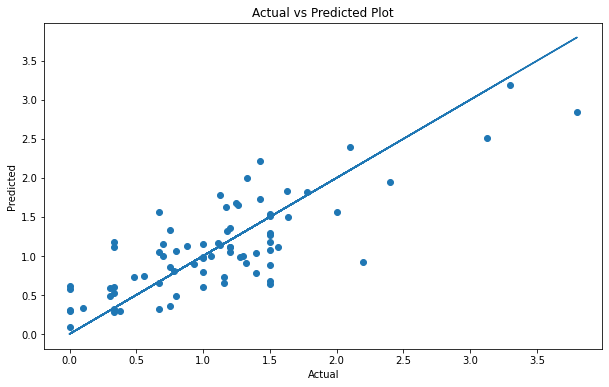

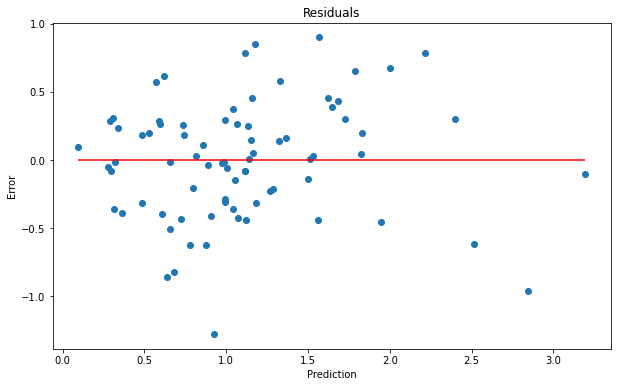

In [71]:
lr = LinearRegression()
lr = evaluateModel(lr, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.4702415465799926
R-squared (R2 ): 0.5159850640203292
MAE 0.3559163631737376

Testing SET
root mean squared error (RMSE): 0.521768466461831
R-squared (R2 ): 0.48062104144644124
MAE 0.4010741137395242


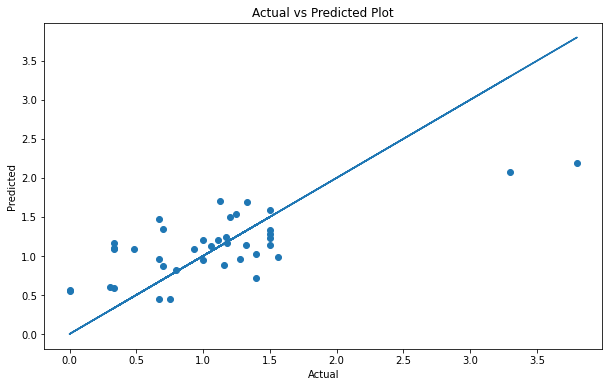

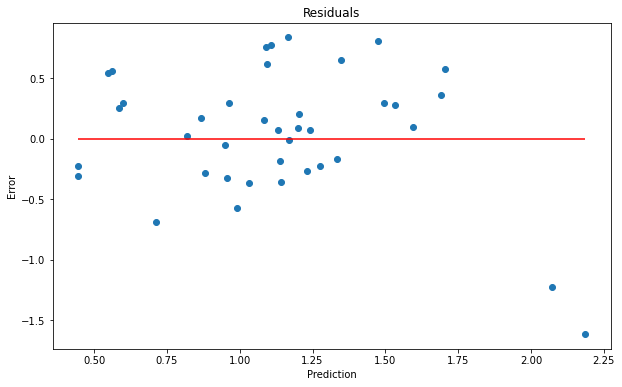

In [13]:
en = ElasticNet()
en = evaluateModel(en,xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.06918670458894682
R-squared (R2 ): 0.9894505321363481
MAE 0.050793508695923265

Testing SET
root mean squared error (RMSE): 0.423089257993282
R-squared (R2 ): 0.6442465440435978
MAE 0.33080828420964775


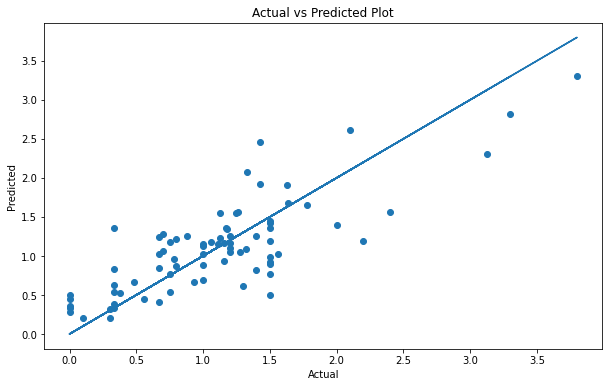

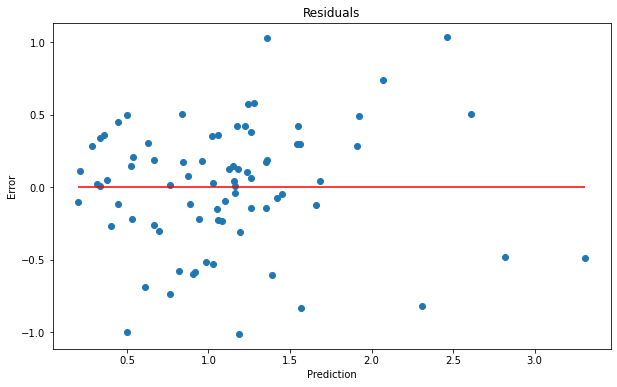

In [72]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=.05)
gb = evaluateModel(gb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.1565351982505816
R-squared (R2 ): 0.9459980704369463
MAE 0.11872732998823911

Testing SET
root mean squared error (RMSE): 0.4719078567457153
R-squared (R2 ): 0.5574120906814273
MAE 0.36433190607241156


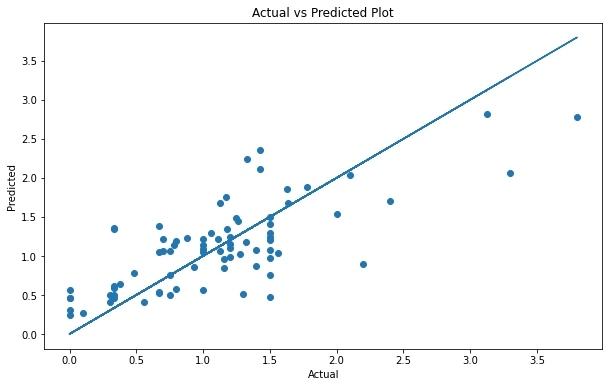

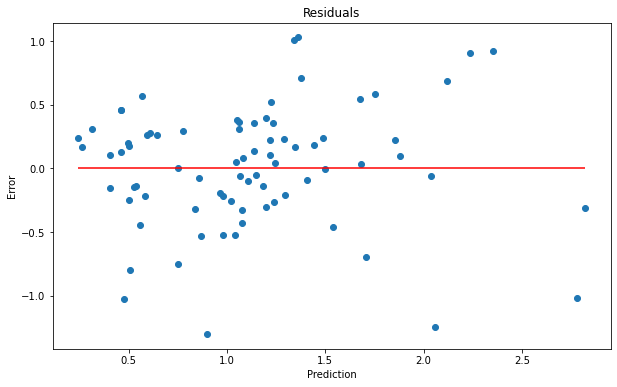

In [73]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.0010363524029436328
R-squared (R2 ): 0.999997649113366
MAE 0.0007117904364025649

Testing SET
root mean squared error (RMSE): 0.4728805811407587
R-squared (R2 ): 0.5733893882248686
MAE 0.3706757035775063


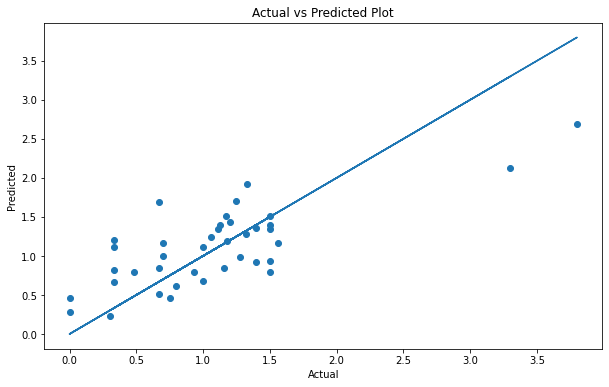

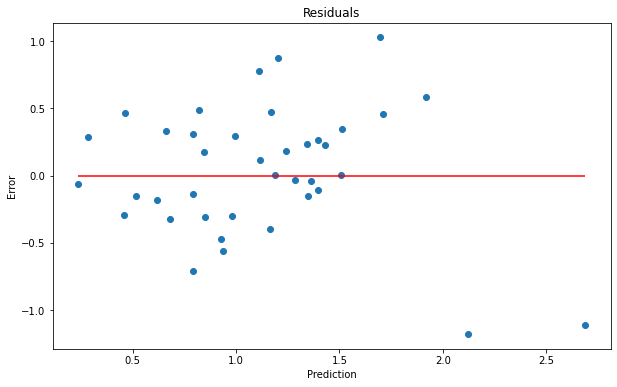

In [16]:
xgb = XGBRegressor(random_state=42)
xgb = evaluateModel(xgb, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.3711051973636962
R-squared (R2 ): 0.6964855751177899
MAE 0.2909910783556211

Testing SET
root mean squared error (RMSE): 0.4270402318120738
R-squared (R2 ): 0.6375711890991829
MAE 0.3351207088247268


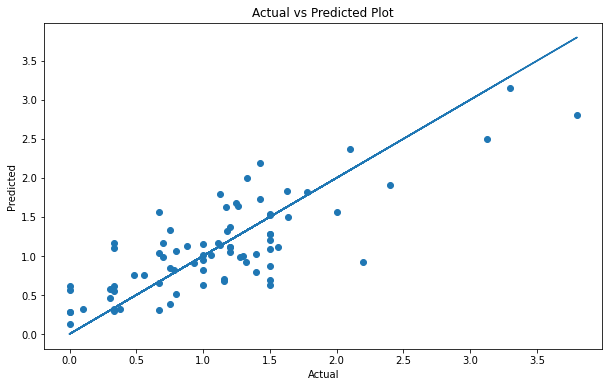

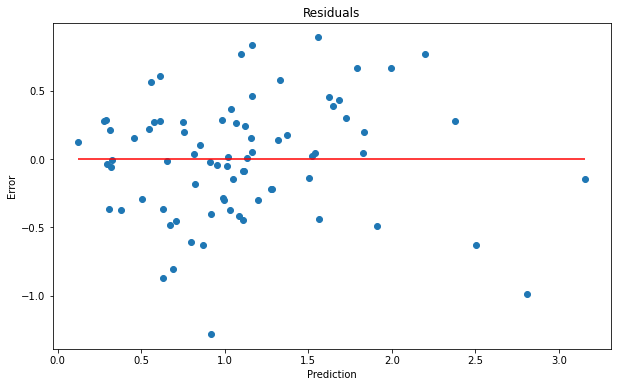

In [74]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.32780144374880377
R-squared (R2 ): 0.7647993631168684
MAE 0.2708073395838751

Testing SET
root mean squared error (RMSE): 0.4507860368104367
R-squared (R2 ): 0.6123233852583545
MAE 0.3716745027553653


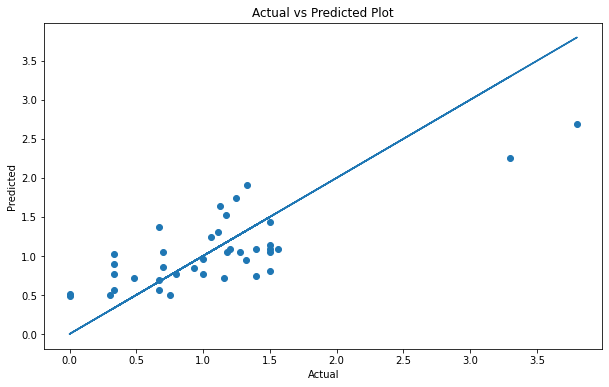

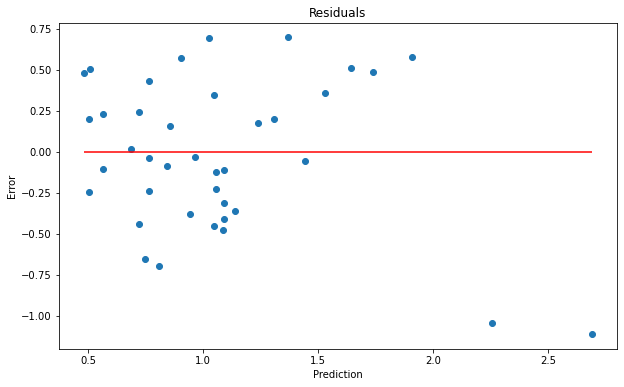

In [17]:
ada = AdaBoostRegressor(random_state=42)
ada = evaluateModel(ada, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.155442672791276
R-squared (R2 ): 0.9471119834800494
MAE 0.113628530259366

Testing SET
root mean squared error (RMSE): 0.45055302798409985
R-squared (R2 ): 0.6127240575043806
MAE 0.36146410256410244


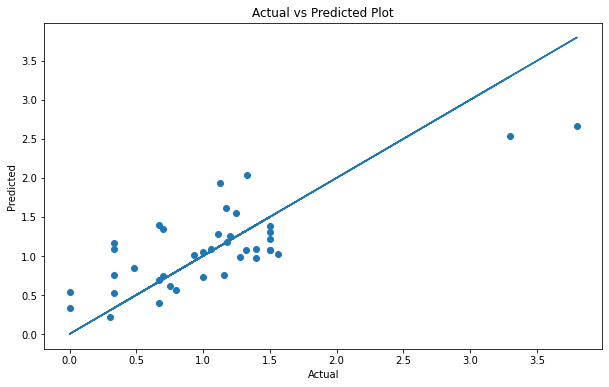

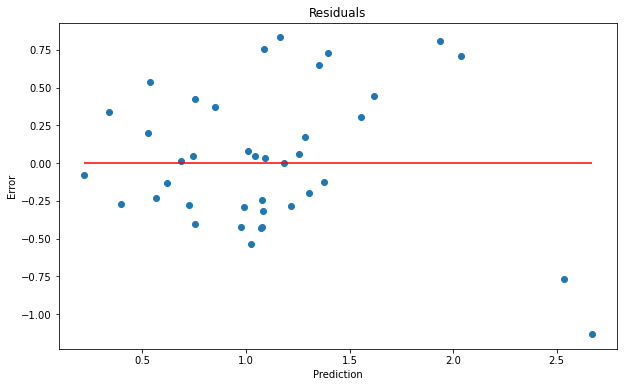

In [33]:
rf = RandomForestRegressor()
rf = evaluateModel(rf, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.1499251597966722
R-squared (R2 ): 0.9507999198611276
MAE 0.11111907780979838

Testing SET
root mean squared error (RMSE): 0.45436785422589737
R-squared (R2 ): 0.6061381736761233
MAE 0.3700964102564102


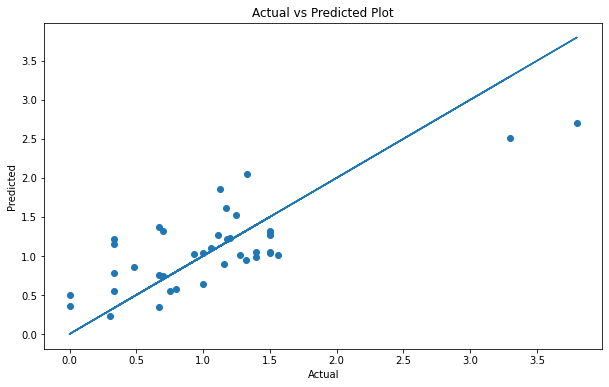

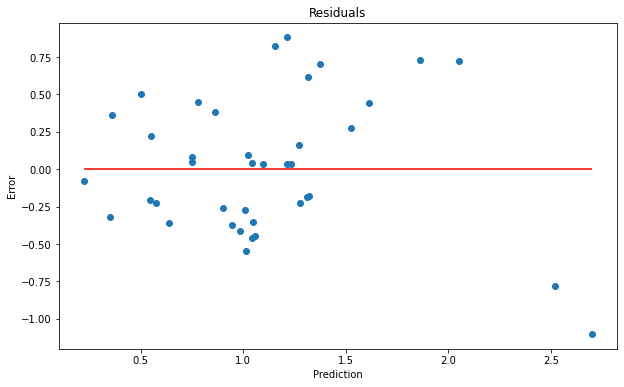

In [34]:
rf = RandomForestRegressor(n_estimators = 250)
rf = evaluateModel(rf, xGS_X_train2, xGS_y_train2, xGS_X_test2, xGS_y_test2)

In [23]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


TRAINING SET
root mean squared error (RMSE): 0.44317590245429117
R-squared (R2 ): 0.7155509692936193
MAE 0.3289990590406532

Testing SET
root mean squared error (RMSE): 0.4474270855812808
R-squared (R2 ): 0.7862050070011897
MAE 0.3553522454371052


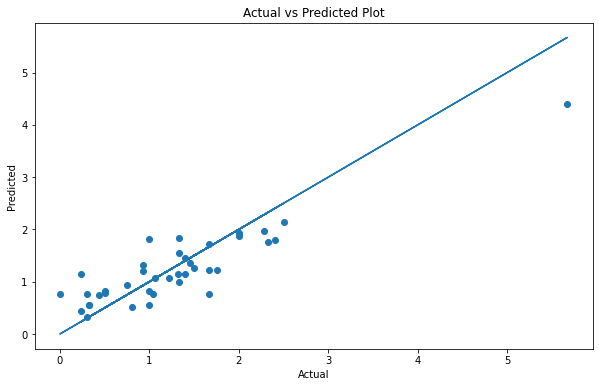

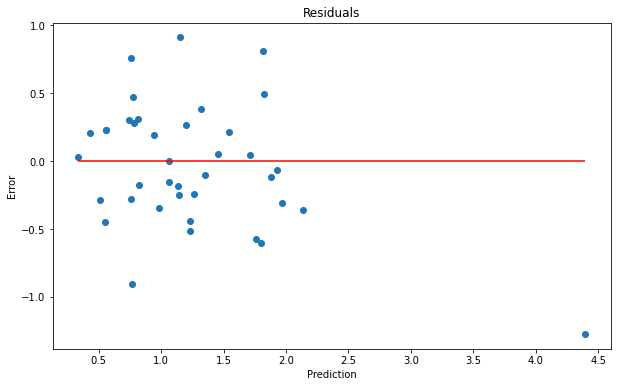

In [32]:
# xGA Model 2 Exploration
lr = LinearRegression()
lr = evaluateModel(lr, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.21570628803719766
R-squared (R2 ): 0.9326127407199511
MAE 0.1542870714439281

Testing SET
root mean squared error (RMSE): 0.6662099347606839
R-squared (R2 ): 0.5260034319334137
MAE 0.45478498366319686


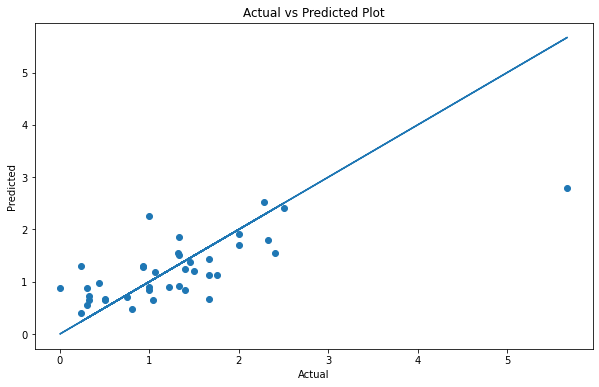

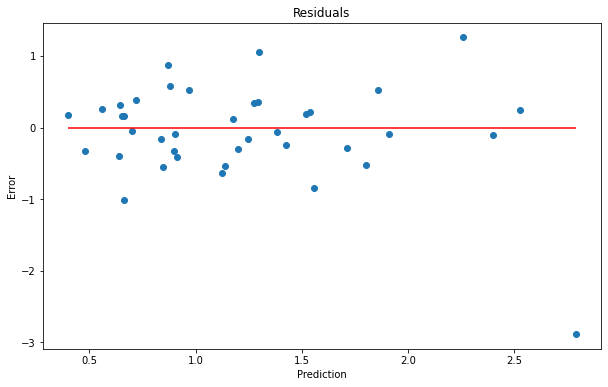

In [19]:
lgbm = LGBMRegressor(random_state=42)
lgbm = evaluateModel(lgbm, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.44326635058867725
R-squared (R2 ): 0.7154348505722478
MAE 0.3287509584973422

Testing SET
root mean squared error (RMSE): 0.450529502290661
R-squared (R2 ): 0.7832298597906795
MAE 0.35551358413467815


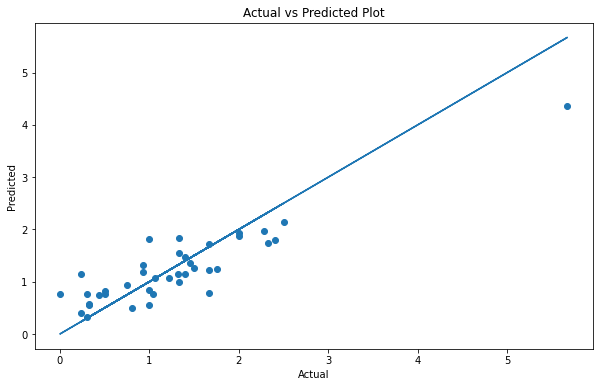

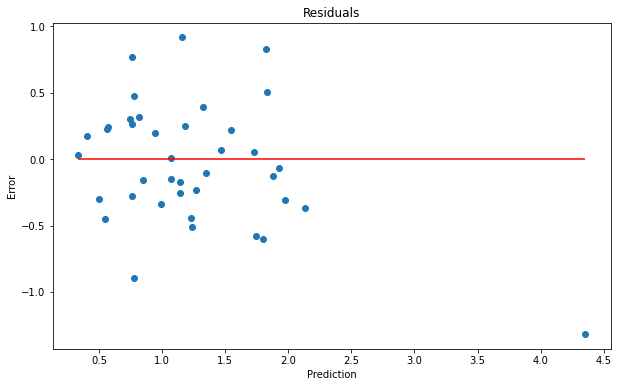

In [31]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

In [ ]:
# Final Ridge Models
lasso_xGS =  ridge.fit(xGS_X2,xGS_y2)
lasso_xGA = ridge.fit(xGA_X2, xGA_y2)

In [ ]:
# xGS and xGA Preds using ridge regeression on second model

xGS_Preds = lasso_xGS.predict()
xGA_Preds = lasso_xGA.predict(xGA_y2)

TRAINING SET
root mean squared error (RMSE): 0.06407699846785668
R-squared (R2 ): 0.9940535673706415
MAE 0.04900039118541892

Testing SET
root mean squared error (RMSE): 0.6322996348773194
R-squared (R2 ): 0.5730285368042365
MAE 0.4883953834779135


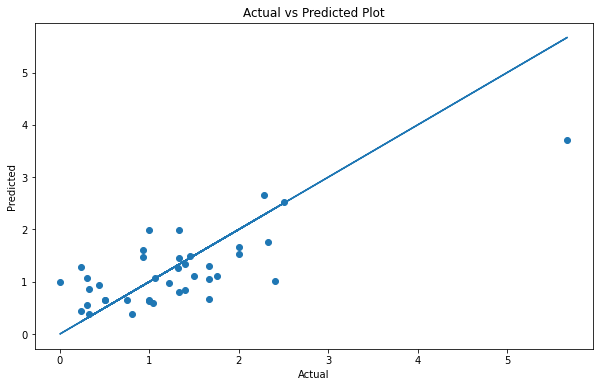

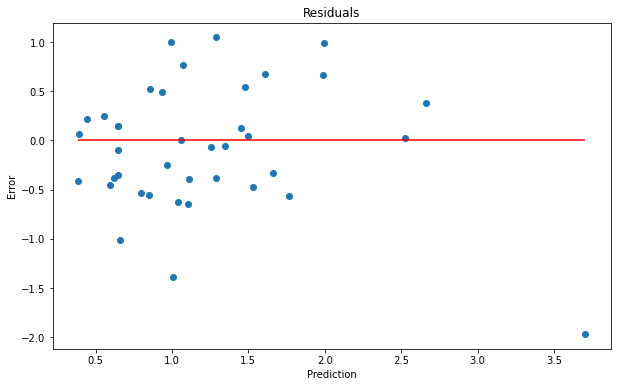

In [41]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=400)
gb = evaluateModel(gb, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.1802290436562139
R-squared (R2 ): 0.9529562710374441
MAE 0.1334034582132566

Testing SET
root mean squared error (RMSE): 0.5776976788295072
R-squared (R2 ): 0.643586428419678
MAE 0.42570961538461577


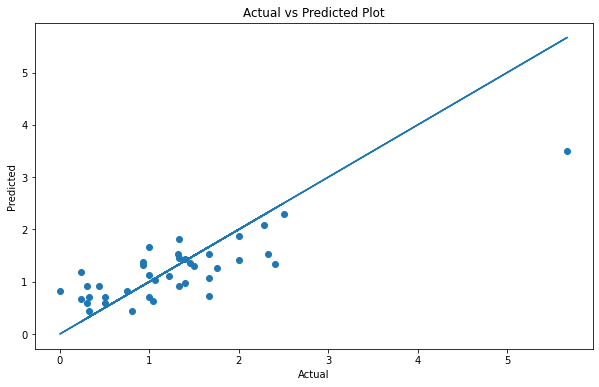

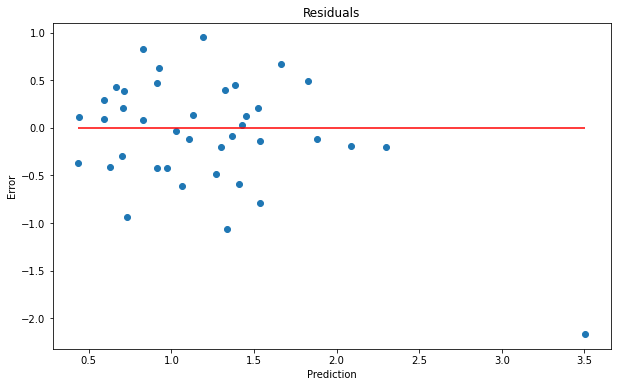

In [42]:
rf = RandomForestRegressor(n_estimators = 400)
rf = evaluateModel(rf, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.097262052807723
R-squared (R2 ): 0.9862994170722093
MAE 0.07506011755231722

Testing SET
root mean squared error (RMSE): 0.6384263187597696
R-squared (R2 ): 0.5647141474053854
MAE 0.4896946385947366


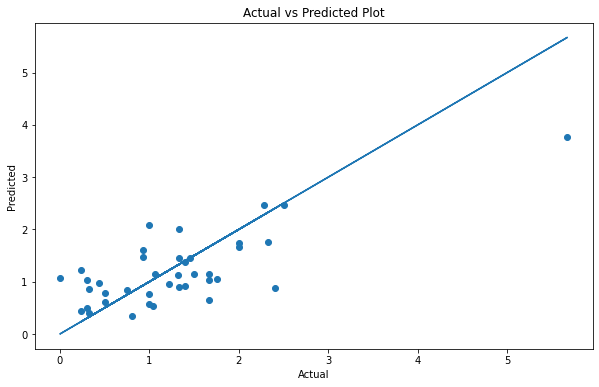

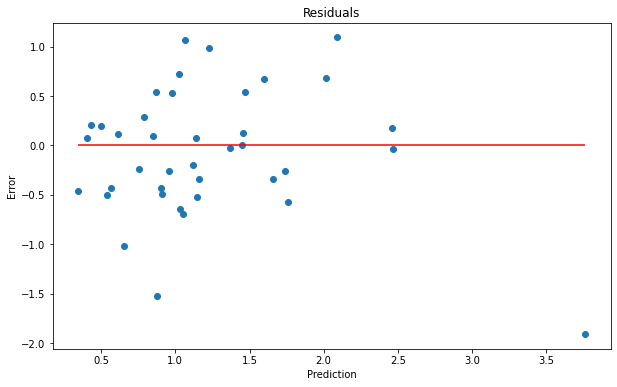

In [58]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=600, learning_rate=.05)
gb = evaluateModel(gb, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)

TRAINING SET
root mean squared error (RMSE): 0.44326635058867725
R-squared (R2 ): 0.7154348505722478
MAE 0.3287509584973422

Testing SET
root mean squared error (RMSE): 0.450529502290661
R-squared (R2 ): 0.7832298597906795
MAE 0.35551358413467815


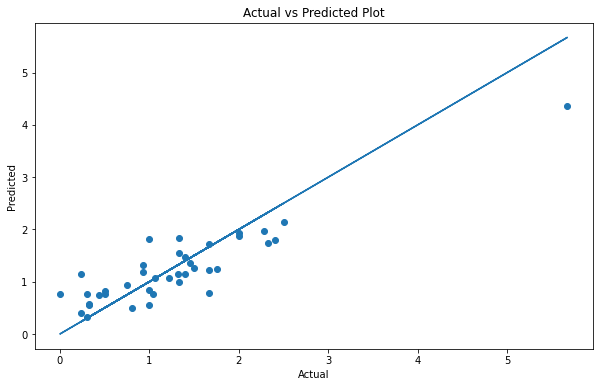

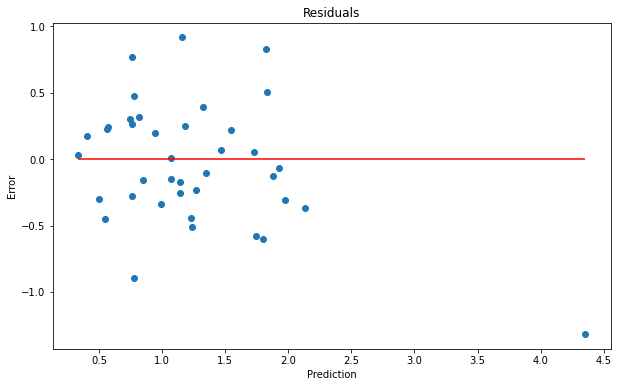

In [60]:
ridge = Ridge()
ridge = evaluateModel(ridge, xGA_X_train2, xGA_y_train2, xGA_X_test2, xGA_y_test2)